# Analysis - exp64

- Control for opt calculations. 

In [1]:
import os
import csv
import numpy as np
import torch as th
import pandas as pd

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, model, run_index=None):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"run_{model}_{r}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

def load_hp(name):
    return pd.read_csv(name, index_col=False)

def find_best(hp, data, window, score="score"):
    scores = []
    for r, mon in enumerate(exp_62):
        if mon is not None:
            full = mon[score]
#             print(len(full))
            selected = full[window[0]:window[1]]
#             print(selected)
            x = np.mean(selected)
#             print(x)
            scores.append(x)
        else:
            scores.append(np.nan)
#     print(scores)
    best = np.nanargmax(scores)
#     print(best)
    return hp[best:best+1]

# Load data

In [10]:
path = "/Users/qualia/Code/azad/data/wythoff/exp64/"

hp_64 = load_hp(os.path.join(path,"grid.csv"))

models = ["DQN_xy4"]
index = (0, 50)

In [11]:
hp_64[0:1]

,row_code,device_code,epsilon,learning_rate
0,0,0,0.1,0.1


# Plots
## All parameter summary

How's it look overall.

### Timecourse

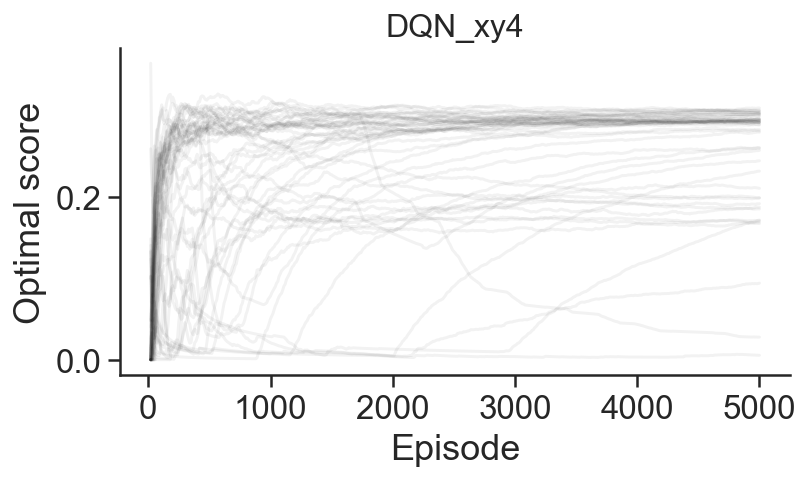

In [12]:
for model in models:
    exp_64 = load_data(path, model, run_index=index)
    plt.figure(figsize=(6, 3))
    for r, mon in enumerate(exp_64):
        if mon is not None:
            _ = plt.plot(mon['episode'], mon['score'], color='black', alpha=0.05)
#             _ = plt.ylim(0, 1)
    _ = plt.title(model)
    _ = plt.ylabel("Optimal score")
    _ = plt.xlabel("Episode")
    sns.despine()

## Initial timecourse 

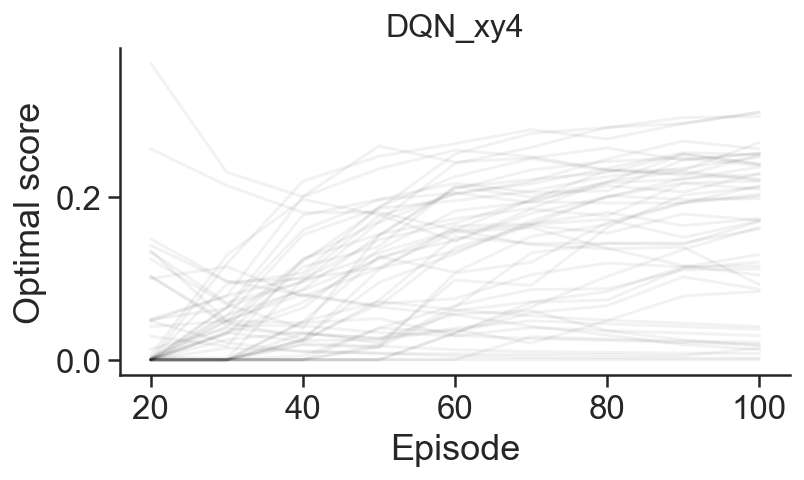

In [13]:
stop = 100 # Plot episodes up until this value
for model in models:
    exp_62 = load_data(path, model, run_index=index)
    plt.figure(figsize=(6, 3))
    for r, mon in enumerate(exp_62):
        if mon is not None:
            t = np.asarray(mon['episode'])
            x = np.asarray(mon['score'])
            avg = np.mean(x)
            m = t <= stop
            _ = plt.plot(t[m], x[m], color='black', alpha=0.05)
    _ = plt.title(model)
    _ = plt.ylabel("Optimal score")
    _ = plt.xlabel("Episode")
    sns.despine()

- There is real progress this time. For the first time with DQN on wythoff's. But why does it stop at arounf 0.3 or so of optimal?
- If it gets this far it should be able to get to the best?
- Code problem?
- Player interaction problem?

# Find the best HP

In [15]:
for model in models:
    exp_64 = load_data(path, model, run_index=index)
    best_hp = find_best(hp_64, exp_64, (450,500))
    print(f"{model}:\n{best_hp}\n---")

DQN_xy4:
   row_code  device_code  epsilon  learning_rate
3         3            3      0.1       0.233333
---
